In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


df= pd.read_csv('bike_sharing_daily.csv')

In [17]:
df.drop('instant',axis=1,inplace=True)

In [58]:
df.describe()
#df.head(5)
#df.yr.value_counts()
#df.weathersit.value_counts()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [76]:
# Verificando a correlação entre as variaveis
#correlation = df.corr(method='pearson')
df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap("coolwarm"),axis=1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.0,-0.0018,0.83,-0.011,-0.0031,0.012,0.019,0.33,0.34,0.21,-0.23,0.21,0.41,0.41
yr,-0.0018,1.0,-0.0018,0.008,-0.0055,-0.002,-0.049,0.048,0.046,-0.11,-0.012,0.25,0.59,0.57
mnth,0.83,-0.0018,1.0,0.019,0.0095,-0.0059,0.044,0.22,0.23,0.22,-0.21,0.12,0.29,0.28
holiday,-0.011,0.008,0.019,1.0,-0.1,-0.25,-0.035,-0.029,-0.033,-0.016,0.0063,0.054,-0.11,-0.068
weekday,-0.0031,-0.0055,0.0095,-0.1,1.0,0.036,0.031,-0.00017,-0.0075,-0.052,0.014,0.06,0.057,0.067
workingday,0.012,-0.002,-0.0059,-0.25,0.036,1.0,0.061,0.053,0.052,0.024,-0.019,-0.52,0.3,0.061
weathersit,0.019,-0.049,0.044,-0.035,0.031,0.061,1.0,-0.12,-0.12,0.59,0.04,-0.25,-0.26,-0.3
temp,0.33,0.048,0.22,-0.029,-0.00017,0.053,-0.12,1.0,0.99,0.13,-0.16,0.54,0.54,0.63
atemp,0.34,0.046,0.23,-0.033,-0.0075,0.052,-0.12,0.99,1.0,0.14,-0.18,0.54,0.54,0.63
hum,0.21,-0.11,0.22,-0.016,-0.052,0.024,0.59,0.13,0.14,1.0,-0.25,-0.077,-0.091,-0.1


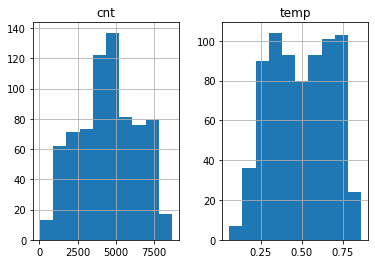

In [99]:
cdf = df[['temp','cnt']]
cdf.head(9)

viz = cdf[['temp','cnt']]
viz.hist()
plt.show()

In [100]:
# os dados têm escalas bem diferentes, entao será necessário normalizá-los
cdf.head(9)

,temp,cnt
0,0.344167,985
1,0.363478,801
2,0.196364,1349
3,0.200000,1562
4,0.226957,1600
5,0.204348,1606
6,0.196522,1510
7,0.165000,959
8,0.138333,822


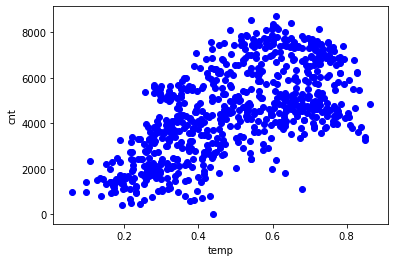

In [103]:
#descobrindo a tendencia do meu grafico, tendencia liniarmente crescente a 
#medida que a temperatura aumenta aumentam os alugueis.

plt.scatter(cdf.temp, cdf.cnt,  color='blue')
plt.xlabel("temp")
plt.ylabel("cnt")
plt.show()

In [121]:
#defininindo 80% do meu dataframe para treinamento e 20% para teste

msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]
test

,temp,cnt
6,0.196522,1510
10,0.169091,1263
13,0.160870,1421
16,0.175833,1000
20,0.177500,1543
...,...,...
709,0.435833,5170
718,0.332500,5267
719,0.330000,4128
720,0.326667,3623


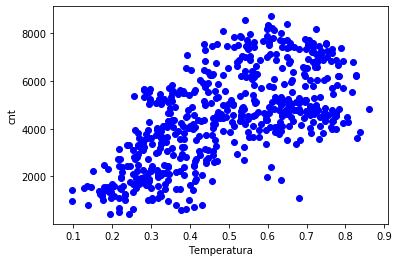

In [105]:
#distribuicao dos dados de treinamento

plt.scatter(train.temp, train.cnt,  color='blue')
plt.xlabel("Temperatura")
plt.ylabel("cnt")
plt.show()

In [130]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(train[['temp']])
X_test = sc_X.transform(test[['temp']])
sc_y = StandardScaler()
y_train = sc_y.fit_transform(train[['cnt']])
y_test = sc_y.fit_transform(test[['cnt']])

# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)

In [126]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train,y_train)
# coeficientes
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.61950944]]
Intercept:  [2.36936725e-16]


Text(0, 0.5, 'cnt')

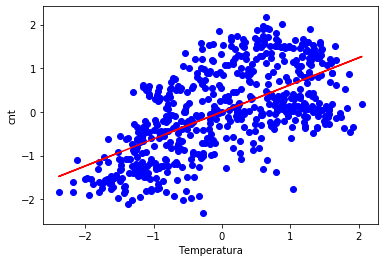

In [127]:
# plot da linha de previsão dos dados.

plt.scatter(X_train,y_train,  color='blue')
plt.plot(X_train, regr.coef_[0][0]*X_train + regr.intercept_[0], '-r')
plt.xlabel("Temperatura")
plt.ylabel("cnt")

In [131]:
from sklearn.metrics import r2_score

test_x = X_test
test_y = y_test
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.62
Residual sum of squares (MSE): 0.57
R2-score: -0.34
